<a href="https://colab.research.google.com/github/AntonioPQMartins/Finance/blob/master/Portfolio_Optimization_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [0]:
#Get stock symbols/tickers in portfolio
#FAANG
assets = ['FB','AMZN','AAPL','NFLX','GOOG']

In [0]:
#Assign weights to the stocks.
weights = np.array([0.2,0.2,0.2,0.2,0.2])


In [0]:
#Get the stock/portfolio starting date
stockStartDate= '2013-01-01'


In [16]:
#Get stocks ending date
today=datetime.today().strftime('%Y-%m-%d')
today


'2020-05-17'

In [0]:
#Create a dataframe to store adjusted close price of the stocks
df = pd.DataFrame()

#Store the adjusted close price of the stock into the df
for stock in assets:
  df[stock] = web.DataReader(stock,data_source='yahoo',start= stockStartDate, end= today)['Adj Close']


In [18]:
df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,68.502106,13.144286,360.274597
2013-01-03,27.770000,258.480011,67.637436,13.798572,360.483826
2013-01-04,28.760000,259.149994,65.753418,13.711429,367.607117
2013-01-07,29.420000,268.459991,65.366646,14.171429,366.003143
2013-01-08,29.059999,266.380005,65.542587,13.880000,365.280823
...,...,...,...,...,...
2020-05-11,213.179993,2409.000000,315.010010,440.519989,1403.260010
2020-05-12,210.100006,2356.949951,311.410004,431.820007,1375.739990
2020-05-13,205.100006,2367.919922,307.649994,438.269989,1349.329956


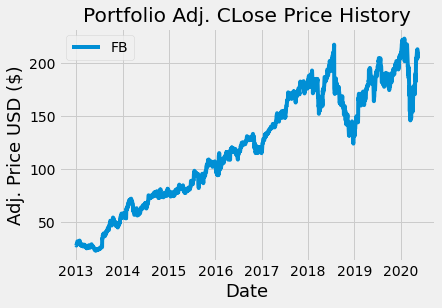

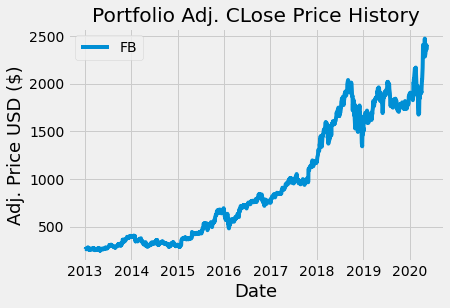

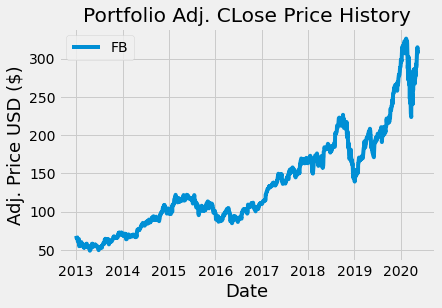

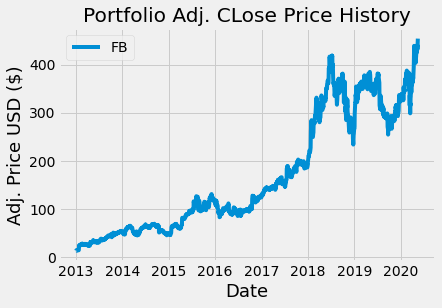

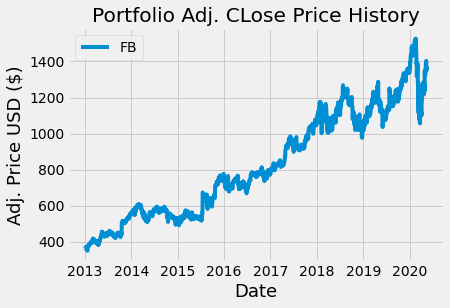

In [21]:
# Visually show the stock / portfolio
title = 'Portfolio Adj. CLose Price History'

#Get the stocks
my_stocks=df

#Create and plot the graph
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c], label=c)

  plt.title(title)
  plt.xlabel('Date', fontsize= 18)
  plt.ylabel('Adj. Price USD ($)', fontsize = 18)
  plt.legend(my_stocks.columns.values, loc= 'upper left')
  plt.show()

In [12]:
returns =df.pct_change()
returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012623,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002692,-0.020565,-0.001974
...,...,...,...,...,...
2020-05-11,0.003909,0.012351,0.015735,0.011411,0.010725
2020-05-12,-0.014448,-0.021606,-0.011428,-0.019749,-0.019611
2020-05-13,-0.023798,0.004654,-0.012074,0.014937,-0.019197


In [13]:
#Create and show the annualized covariance matrix
cov_matrix_anual = returns.cov() * 252
cov_matrix_anual

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.115904,0.051822,0.040496,0.054077,0.048463
AMZN,0.051822,0.091997,0.035507,0.061166,0.046559
AAPL,0.040496,0.035507,0.076527,0.031745,0.037209
NFLX,0.054077,0.061166,0.031745,0.213856,0.048836
GOOG,0.048463,0.046559,0.037209,0.048836,0.064965


In [15]:
#Calculate portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix_anual,weights))
port_variance

0.05900037436228073

In [16]:
# Calc portfolio volatility ( stdrd deviation)
port_volatility= np.sqrt(port_variance)
port_volatility

0.2428999266411596

In [17]:
#calc annual portfolio return
portfolioSimpleAnnualReturn= np.sum(returns.mean()* weights) * 252
portfolioSimpleAnnualReturn

0.34454987932059994

In [19]:
#Show expected annual return, volatility (risk), variance

percent_var = str(round(port_variance,2)*100) + '%'
percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_ret= str(round(portfolioSimpleAnnualReturn,2)*100)+ '%'

print( 'Expexted annual return: '+ percent_ret)
print('Annual volatility / risk :' + percent_vols)
print('Annual variance: '+ percent_var)

#try to diminish risk and increase returns

Expexted annual return: 34.0%
Annual volatility / risk :24.0%
Annual variance: 6.0%


In [2]:
pip install PyPortfolioOpt

In [0]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [22]:
#Portfolio Optimization

#Calc the expected returns and annualised sample covariance matrix of asset returns
mu= expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# optimize for max sharpe ratio 
ef =EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

{'FB': 0.15253, 'AMZN': 0.29217, 'AAPL': 0.19664, 'NFLX': 0.35866, 'GOOG': 0.0}
Expected annual return: 41.0%
Annual volatility: 27.5%
Sharpe Ratio: 1.42


(0.41020523090682626, 0.27451856188957835, 1.4214165636776919)

In [24]:
#Get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights= cleaned_weights
da= DiscreteAllocation(weights, latest_prices,total_portfolio_value = 15000)

allocation, leftover = da.lp_portfolio()
print('Discrete allocation:', allocation)
print('Funds remaining: ${:.2f}'. format(leftover))

Discrete allocation: {'FB': 11.0, 'AMZN': 2.0, 'AAPL': 9.0, 'NFLX': 11.0}
Funds remaining: $95.28
